In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [3]:
filePath = '../Data/heart.csv'

data = pd.read_csv(filePath)

data.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
print("(Rows, columns): " + str(data.shape))
data.columns 

(Rows, columns): (918, 12)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
#Unique values for each variable
data.nunique(axis=0)

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [6]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
#Min values of RestingBP and Cholesterol are 0, wich is not relistic, so its a good idea to replace them. 
#In this case the mean is going to be used to replace these values
avg_RestingBP=data[data['RestingBP']!=0]['RestingBP'].astype('float').mean(axis=0)
data["RestingBP"].replace(0, avg_RestingBP, inplace=True)
avg_Cholesterol=data[data['Cholesterol']!=0]['Cholesterol'].astype('float').mean(axis=0)
data["Cholesterol"].replace(0, avg_Cholesterol, inplace=True)
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540894,244.635389,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989932,53.318029,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
#Check for missing values
print(data.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [9]:
#Check if there's a good proportion between the outputs
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [10]:
#Defining custom labes for the dataset after applying one hot encoding
labels_proc = ['Sex_F', 'Sex_M',
       'ChestPainType_ASY','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N','ExerciseAngina_Y', 
       'ST_Slope_Down','ST_Slope_Flat', 'ST_Slope_Up',
       'Age', 'RestingBP', 'Cholesterol',
       'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease']
labels_proc

['Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [11]:
#Preprocesing data with One Hot Encoder for training the models. This dataset includes the output class
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
transformer = make_column_transformer(
    (OneHotEncoder(), ["Sex", "ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]),
    remainder='passthrough')
transformerOHE = transformer.fit(data)
transformed = transformerOHE.transform(data)
data_proc = pd.DataFrame(transformed, columns=labels_proc)
data_proc

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,...,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,40.0,140.0,289.0,0.0,172.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,49.0,160.0,180.0,0.0,156.0,1.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,37.0,130.0,283.0,0.0,98.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,48.0,138.0,214.0,0.0,108.0,1.5,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,54.0,150.0,195.0,0.0,122.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,45.0,110.0,264.0,0.0,132.0,1.2,1.0
914,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,68.0,144.0,193.0,1.0,141.0,3.4,1.0
915,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,57.0,130.0,131.0,0.0,115.0,1.2,1.0
916,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,57.0,130.0,236.0,0.0,174.0,0.0,1.0


In [12]:
#Preprocesing data with One Hot Encoder predicting. This dataset does not include the output class.
#This encoder will be saved later to be used in the app to encode the incoming data
labels_proc_pred = ['Sex_F', 'Sex_M',
       'ChestPainType_ASY','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N','ExerciseAngina_Y', 
       'ST_Slope_Down','ST_Slope_Flat', 'ST_Slope_Up',
       'Age', 'RestingBP', 'Cholesterol',
       'FastingBS', 'MaxHR', 'Oldpeak']
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
pred_data = data.copy().drop(columns=["HeartDisease"])
#pred_data.drop(columns=["HeartDisease"])
transformer_pred = make_column_transformer(
    (OneHotEncoder(), ["Sex", "ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]),
    remainder='passthrough')
transformerOHE_pred = transformer_pred.fit(pred_data)
transformed_pred = transformerOHE_pred.transform(pred_data)
data_proc_pred = pd.DataFrame(transformed_pred, columns=labels_proc_pred)
data_proc_pred

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,40.0,140.0,289.0,0.0,172.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,49.0,160.0,180.0,0.0,156.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,37.0,130.0,283.0,0.0,98.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,48.0,138.0,214.0,0.0,108.0,1.5
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,54.0,150.0,195.0,0.0,122.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,45.0,110.0,264.0,0.0,132.0,1.2
914,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,68.0,144.0,193.0,1.0,141.0,3.4
915,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,57.0,130.0,131.0,0.0,115.0,1.2
916,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,57.0,130.0,236.0,0.0,174.0,0.0


In [13]:
#assigning data and outputs to X, Y
X = data_proc.iloc[:, :-1].values
y = data_proc.iloc[:, -1].values

In [14]:
#Splitting data between training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)  

In [15]:
#Normalize splitted data to be used to train models without Cross Validation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaler = sc.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[-0.52162923,  0.52162923,  0.92894788, ..., -0.54691411,
        -0.68458394,  1.58632168],
       [ 1.91707048, -1.91707048, -1.07648666, ..., -0.54691411,
         0.06965904, -0.81105954],
       [ 1.91707048, -1.91707048,  0.92894788, ..., -0.54691411,
        -0.92276594,  0.14789295],
       ...,
       [-0.52162923,  0.52162923,  0.92894788, ..., -0.54691411,
         0.26814403,  3.02475041],
       [-0.52162923,  0.52162923, -1.07648666, ..., -0.54691411,
         0.90329602,  0.14789295],
       [ 1.91707048, -1.91707048, -1.07648666, ..., -0.54691411,
         0.18875004, -0.81105954]])

In [16]:
#Normalize all the data to use it to train models with Cross Validation
#This scaler will also be saved later to scale incoming data in the app
from sklearn.preprocessing import StandardScaler
sc_all = StandardScaler()
scaler_all = sc_all.fit(X)
X_all = scaler.transform(X)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression

In [20]:
#Performing GridSearch and Cross-Validation with a LogisticRegression to get the best hyper-parameters
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)#Dictionary containing the diferent parameters to test
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.863856 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.860591 (0.037313) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.860591 (0.037313) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.860591 (0.037313) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.860591 (0.037313) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.860591 (0.037313) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.860591 (0.037313) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.860591 (0.037313) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.860591 (0.037313) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.860591 (0.037313) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.860591 (0.037313) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.859866 (0.037237) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.859866 (0.037237) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.860229 (0.037065) with: {'C': 1.0, 'pena

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88        74
         1.0       0.92      0.93      0.92       110

    accuracy                           0.91       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184



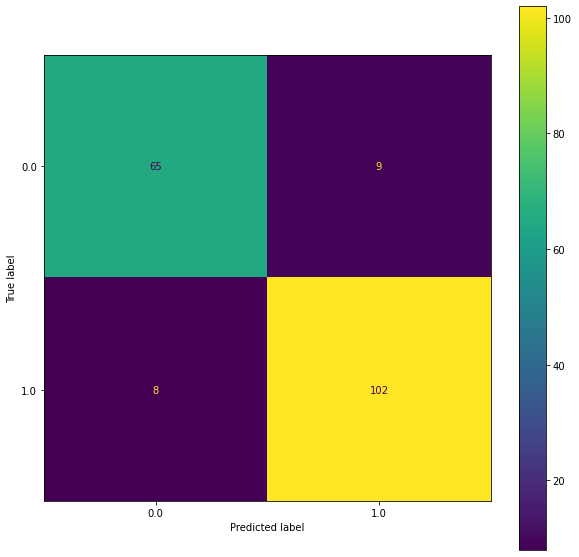

In [34]:
#Creating the LogisticRegression model with the previously obtained parameters and the splitted data
from sklearn.linear_model import LogisticRegression
l_reg = LogisticRegression(C = 0.01, penalty='l2',solver ='liblinear',warm_start=True) # get instance of model
l_reg.fit(x_train, y_train) # Train/Fit model 

y_pred1 = l_reg.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, y_pred1)) # output accuracy
cm_l_reg = confusion_matrix(y_test, y_pred1, labels=l_reg.classes_)
disp_l_reg = ConfusionMatrixDisplay(confusion_matrix=cm_l_reg,display_labels=l_reg.classes_)
disp_l_reg.plot()
plt.show()

In [22]:
#Making a prediction using the model, the scaler and the ecoder
non_proc_labels = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
testData = np.array([[49,'F','NAP',160,180,0,'Normal',156,'N',1.0,'Flat']])
test_pd = pd.DataFrame(testData,columns=non_proc_labels)
transformed_test = transformerOHE_pred.transform(test_pd)
sc_transformed_test = scaler.transform(transformed_test)
sc_transformed_test

array([[ 1.91707048, -1.91707048, -1.07648666, -0.47042304,  1.83549656,
        -0.23688628, -0.51104636,  0.82673227, -0.49829642,  0.80817891,
        -0.80817891, -0.23688628,  0.98378271, -0.88405509, -0.47176562,
         1.54576177, -1.17726019, -0.54691411,  0.74450802,  0.14789295]])

In [23]:
#Prediction
l_reg.predict(sc_transformed_test)[0]

0.0

In [24]:
#Prediction probability
l_reg.predict_proba(sc_transformed_test)[0][1]*100

25.50963601847165

# Ridge Classifer

In [25]:
#Performing GridSearch and Cross-Validation with a RidgeClassifier to get the best hyper-parameters
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
random_state = range(10)
# define grid search
grid = dict(alpha=alpha,solver=solver,random_state=random_state)#Dictionary containing the diferent parameters to test
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.863844 using {'alpha': 0.1, 'random_state': 0, 'solver': 'sag'}
0.863481 (0.034787) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'auto'}
0.863481 (0.034787) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'svd'}
0.863481 (0.034787) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'cholesky'}
0.863119 (0.034665) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'lsqr'}
0.863481 (0.034446) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'sparse_cg'}
0.863844 (0.034565) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'sag'}
0.863844 (0.034565) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'saga'}
0.000000 (0.000000) with: {'alpha': 0.1, 'random_state': 0, 'solver': 'lbfgs'}
0.863481 (0.034787) with: {'alpha': 0.1, 'random_state': 1, 'solver': 'auto'}
0.863481 (0.034787) with: {'alpha': 0.1, 'random_state': 1, 'solver': 'svd'}
0.863481 (0.034787) with: {'alpha': 0.1, 'random_state': 1, 'solver': 'cholesky'}
0.863119 (0.034665) with: {'alpha': 0.1, 'random_state': 1,

c:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3000 fits failed out of a total of 24000.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\linear_model\_ridge.py", line 1302, in fit
    super().fit(X, Y, sample_weight=sample_weight)
  File "c:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\linear_model\_ridge.py", line 705, in fit

              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90        74
         1.0       0.93      0.95      0.94       110

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



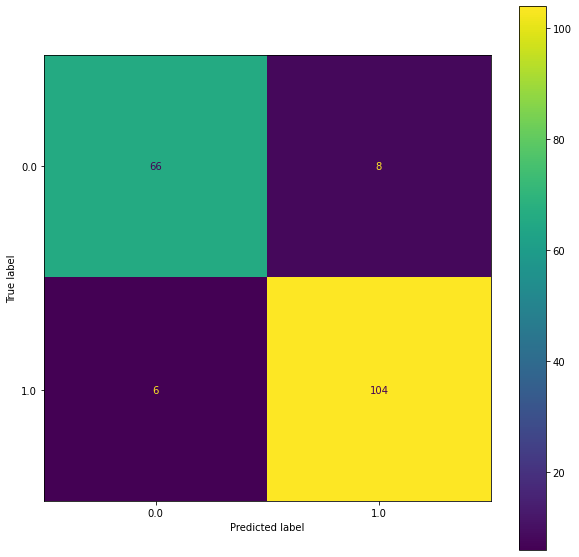

In [35]:
#Creating the LogisticRegression model with the previously obtained parameters and the splitted data
from sklearn.linear_model import RidgeClassifier
ridge_class = RidgeClassifier(alpha= 0.1, random_state= 0, solver= 'sag') # get instance of model
ridge_class.fit(x_train, y_train) # Train/Fit model 
#Testing the model with the classification report and confusion matrix
y_pred2 = ridge_class.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy
cm_ridge_class = confusion_matrix(y_test, y_pred2, labels=ridge_class.classes_)
disp_ridge_class = ConfusionMatrixDisplay(confusion_matrix=cm_ridge_class,display_labels=ridge_class.classes_)
disp_ridge_class.plot()
plt.show()

# K-Nearest Neighbors

In [27]:
#Performing GridSearch and Cross-Validation with a KNeighborsClassifier to get the best hyper-parameters
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
n_neighbors = range(1, 25, 2)
weights = ['uniform', 'distance']
algorithm = ['ball_tree','kd_tree','brute','auto']
metric = ['euclidean', 'manhattan', 'minkowski']
leaf_size = range(10, 70, 10)
# define grid search
#Dictionary containing the diferent parameters to test
grid = dict(n_neighbors=n_neighbors,weights=weights,algorithm=algorithm,metric=metric,leaf_size=leaf_size)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.870035 using {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
0.799920 (0.035880) with: {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.799920 (0.035880) with: {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.853683 (0.030393) with: {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.849331 (0.031570) with: {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.852600 (0.038212) with: {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.848244 (0.037180) with: {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.855877 (0.035376) with: {'algorithm': 'ball_tree', 'leaf_size': 10, 

              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86        74
         1.0       0.89      0.93      0.91       110

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.89       184
weighted avg       0.89      0.89      0.89       184



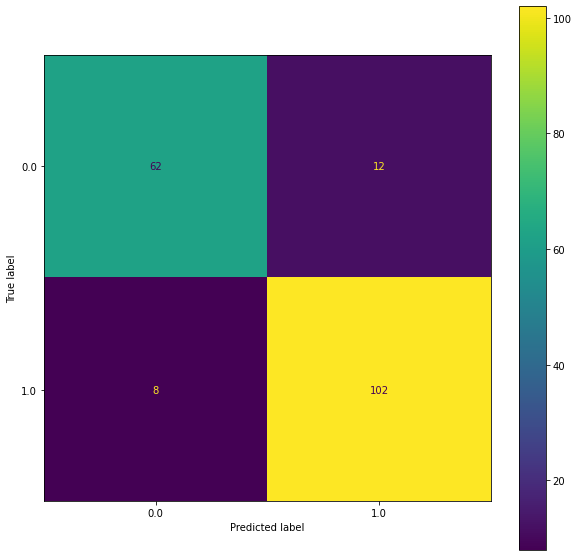

In [36]:
#Creating the KNeighborsClassifier model with the previously obtained parameters and the splitted data
from sklearn.neighbors import KNeighborsClassifier
k_near = KNeighborsClassifier(metric='manhattan', n_neighbors=15, 
                              weights='uniform', leaf_size = 10,algorithm='ball_tree') # get instance of model
k_near.fit(x_train, y_train) # Train/Fit model 
y_pred3 = k_near.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, y_pred3)) # output accuracy
cm_k_near = confusion_matrix(y_test, y_pred3, labels=k_near.classes_)
disp_k_near = ConfusionMatrixDisplay(confusion_matrix=cm_k_near,display_labels=k_near.classes_)
disp_k_near.plot()
plt.show()

# SVM

In [29]:
#Performing GridSearch and Cross-Validation with a SVC to get the best hyper-parameters
from sklearn.svm import SVC
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale','auto']
random_state = range(1,20,2)
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma,random_state=random_state)#Dictionary containing the diferent parameters to test
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.864935 using {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid', 'random_state': 1}
0.794832 (0.046915) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 1}
0.794832 (0.046915) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 3}
0.794832 (0.046915) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 5}
0.794832 (0.046915) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 7}
0.794832 (0.046915) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 9}
0.794832 (0.046915) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 11}
0.794832 (0.046915) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 13}
0.794832 (0.046915) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 15}
0.794832 (0.046915) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 17}
0.794832 (0.046915) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'random_state':

              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90        74
         1.0       0.92      0.95      0.93       110

    accuracy                           0.92       184
   macro avg       0.92      0.91      0.91       184
weighted avg       0.92      0.92      0.92       184



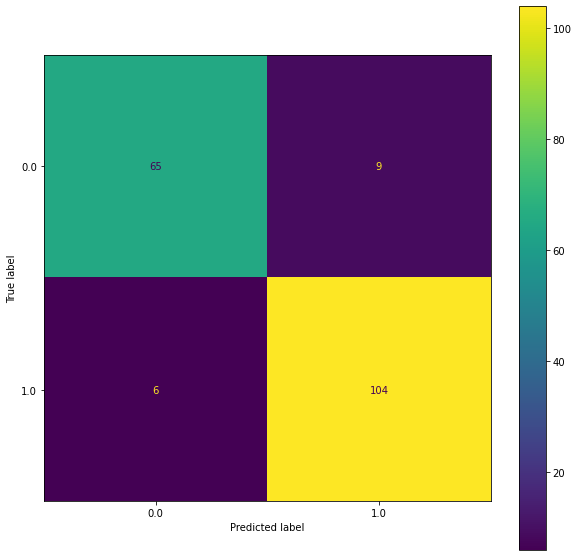

In [37]:
#Creating the SVC model with the previously obtained parameters and the splitted data
from sklearn.svm import SVC
svm = SVC(C=0.1, gamma='scale',kernel= 'sigmoid',random_state=1,probability=True) # get instance of model
svm.fit(x_train, y_train) # Train/Fit model 
y_pred4 = svm.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, y_pred4)) # output accuracy
cm_svm = confusion_matrix(y_test, y_pred4, labels=svm.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm,display_labels=svm.classes_)
disp_svm.plot()
plt.show()

# Decision Tree

In [31]:
#Performing GridSearch and Cross-Validation with a DecisionTreeClassifier to get the best hyper-parameters 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = range(2,20,2)
max_features = range(2,20,2)
# define grid search
#Dictionary containing the diferent parameters to test
grid = dict(criterion=criterion,splitter=splitter,max_depth=max_depth,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.855148 using {'criterion': 'entropy', 'max_depth': 4, 'max_features': 8, 'splitter': 'random'}
0.749940 (0.062921) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 2, 'splitter': 'best'}
0.724383 (0.082541) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 2, 'splitter': 'random'}
0.776390 (0.067457) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 4, 'splitter': 'best'}
0.794888 (0.049720) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 4, 'splitter': 'random'}
0.794533 (0.046614) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 6, 'splitter': 'best'}
0.806502 (0.043216) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 6, 'splitter': 'random'}
0.805785 (0.048746) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 8, 'splitter': 'best'}
0.802831 (0.043201) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 8, 'splitter': 'random'}
0.796707 (0.039222) with: {'criterion': 'gini', 'max_depth': 2, '

              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88        74
         1.0       0.90      0.95      0.92       110

    accuracy                           0.91       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184



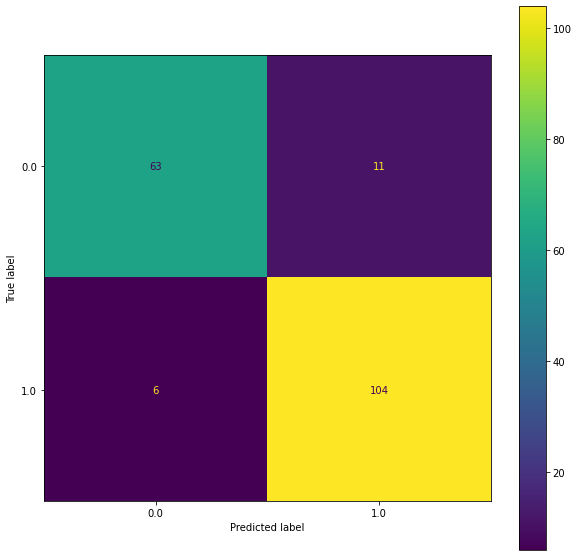

In [38]:
#Creating the DecisionTreeClassifier model with the previously obtained parameters and the splitted data
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, max_features= 8, splitter='random') # get instance of model
dec_tree.fit(x_train, y_train) # Train/Fit model 
y_pred5 = dec_tree.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, y_pred5)) # output accuracy
cm_dec_tree = confusion_matrix(y_test, y_pred5, labels=dec_tree.classes_)
disp_dec_tree = ConfusionMatrixDisplay(confusion_matrix=cm_dec_tree,display_labels=dec_tree.classes_)
disp_dec_tree.plot()
plt.show()

# Multi-Layer Perceptron

In [20]:
#Performing GridSearch and Cross-Validation with a MLPClassifier to get the best hyper-parameters
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
hidden_layer_sizes = np.arange(10, 12)
activation = ['identity', 'logistic', 'tanh','relu']
solver = ['lbfgs','sgd','adam']
learning_rate = ['constant', 'invscaling', 'adaptive']
#alpha = 10.0 ** -np.arange(1, 10)
#max_iter = range(200,600,50)
max_iter = [1000]
random_state = range(4)
# define grid search
#Dictionary containing the diferent parameters to test
grid = dict(activation=activation,hidden_layer_sizes=hidden_layer_sizes,
            solver=solver,max_iter=max_iter,random_state=random_state,
           learning_rate=learning_rate)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.870381 using {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'max_iter': 1000, 'random_state': 0, 'solver': 'sgd'}
0.860591 (0.037313) with: {'activation': 'identity', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'max_iter': 1000, 'random_state': 0, 'solver': 'lbfgs'}
0.859504 (0.037957) with: {'activation': 'identity', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'max_iter': 1000, 'random_state': 0, 'solver': 'sgd'}
0.863127 (0.034740) with: {'activation': 'identity', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'max_iter': 1000, 'random_state': 0, 'solver': 'adam'}
0.860591 (0.037313) with: {'activation': 'identity', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'max_iter': 1000, 'random_state': 1, 'solver': 'lbfgs'}
0.858413 (0.041392) with: {'activation': 'identity', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'max_iter': 1000, 'random_state': 1, 'solver': 'sgd'}
0.857322 (0.038459) with: {'acti

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89        74
         1.0       0.94      0.90      0.92       110

    accuracy                           0.91       184
   macro avg       0.90      0.91      0.90       184
weighted avg       0.91      0.91      0.91       184



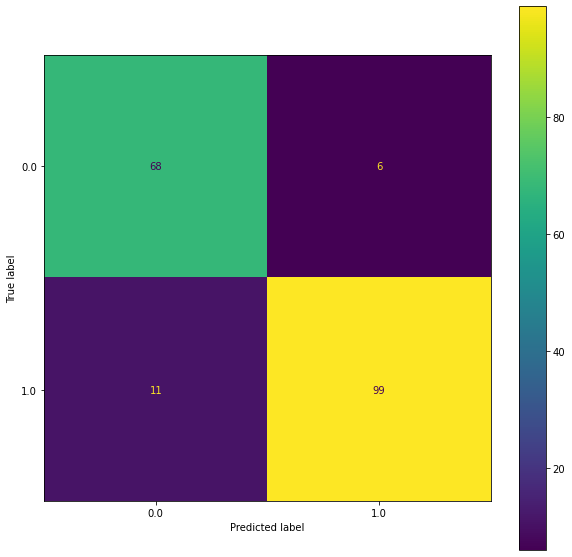

In [39]:
#Creating the MLPClassifier model with the previously obtained parameters and the splitted data
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation= 'relu', hidden_layer_sizes= 10, max_iter= 1000, random_state= 0, solver= 'sgd',
                   learning_rate = 'constant') # get instance of model
mlp.fit(x_train, y_train) # Train/Fit model 
y_pred6 = mlp.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, y_pred6)) # output accuracy
cm_mlp = confusion_matrix(y_test, y_pred6, labels=mlp.classes_)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp,display_labels=mlp.classes_)
disp_mlp.plot()
plt.show()

In [57]:
#Getting all the parameters of the mlp model
mlp.get_params()

{'activation': 'logistic',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 11,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [58]:
#Re-training mlp
mlp.partial_fit([x_train[0]] ,[y_train[0]])

MLPClassifier(activation='logistic', hidden_layer_sizes=11, max_iter=1000,
              random_state=0, solver='sgd')

# Bagged Decision Trees (Bagging)

In [22]:
#Performing GridSearch and Cross-Validation with a BaggingClassifier to get the best hyper-parameters
from sklearn.ensemble import BaggingClassifier
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)#Dictionary containing the diferent parameters to test
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.856243 using {'n_estimators': 1000}
0.835925 (0.047199) with: {'n_estimators': 10}
0.854045 (0.044237) with: {'n_estimators': 100}
0.856243 (0.039454) with: {'n_estimators': 1000}


              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81        74
         1.0       0.89      0.85      0.87       110

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



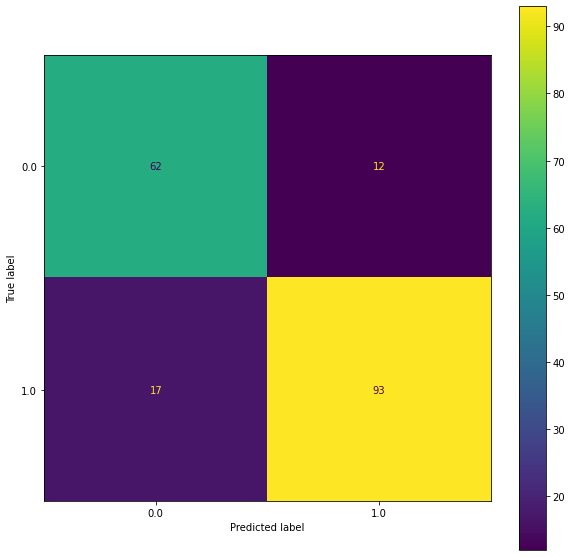

In [40]:
#Creating the BaggingClassifier model with the previously obtained parameters and the splitted data
from sklearn.ensemble import BaggingClassifier
bd_tree = BaggingClassifier(n_estimators=1000) # get instance of model
bd_tree.fit(x_train, y_train) # Train/Fit model 
y_pred6 = bd_tree.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, y_pred6)) # output accuracy
cm_bd_tree = confusion_matrix(y_test, y_pred6, labels=bd_tree.classes_)
disp_bd_tree = ConfusionMatrixDisplay(confusion_matrix=cm_bd_tree,display_labels=bd_tree.classes_)
disp_bd_tree.plot()
plt.show()

# Random Forest

In [24]:
#Performing GridSearch and Cross-Validation with a RandomForestClassifier to get the best hyper-parameters
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
criterion = ['gini','entropy','log_loss']
class_weight = ['balanced','balanced_subsample']
# define grid search
#Dictionary containing the diferent parameters to test
grid = dict(n_estimators=n_estimators,max_features=max_features,criterion=criterion,class_weight=class_weight)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

c:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):

Best: 0.871122 using {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 1000}
0.852246 (0.037948) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10}
0.867849 (0.035972) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
0.867483 (0.040550) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 1000}
0.845692 (0.038267) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 10}
0.869669 (0.036805) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}
0.871122 (0.035780) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 1000}
0.855873 (0.039004) with: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 10}
0.867117 (0.032278) with: {'class_

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88        74
         1.0       0.91      0.93      0.92       110

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



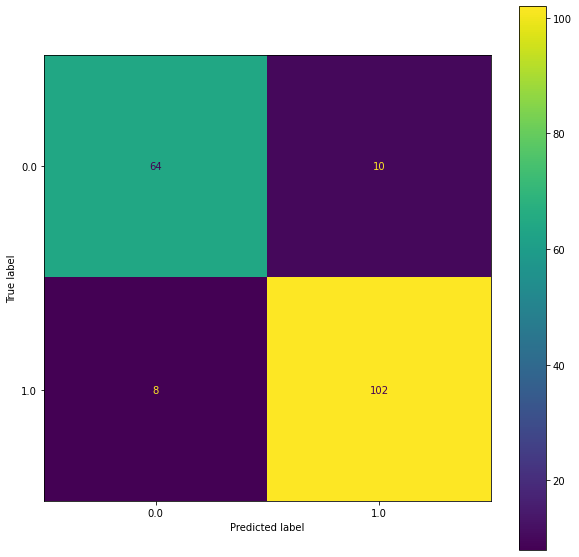

In [41]:
#Creating the RandomForestClassifier model with the previously obtained parameters and the splitted data
from sklearn.ensemble import RandomForestClassifier
rd_forest = RandomForestClassifier(max_features= 'log2', n_estimators= 1000,class_weight='balanced',
                                  criterion='gini',) # get instance of model
rd_forest.fit(x_train, y_train) # Train/Fit model 
y_pred7 = rd_forest.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, y_pred7)) # output accuracy
cm_rd_forest = confusion_matrix(y_test, y_pred7, labels=rd_forest.classes_)
disp_rd_forest = ConfusionMatrixDisplay(confusion_matrix=cm_rd_forest,display_labels=rd_forest.classes_)
disp_rd_forest.plot()
plt.show()

# Stochastic Gradient Boosting

In [25]:
#Performing GridSearch and Cross-Validation with a GradientBoostingClassifier to get the best hyper-parameters
from sklearn.ensemble import GradientBoostingClassifier
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
#Dictionary containing the diferent parameters to test
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.876202 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.553368 (0.001959) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.553368 (0.001959) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.553368 (0.001959) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.553368 (0.001959) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.553368 (0.001959) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.553368 (0.001959) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.851147 (0.044982) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}
0.849327 (0.040938) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
0.850418 (0.041099) with: {'learning_rate': 0.001, 'ma

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87        74
         1.0       0.91      0.92      0.91       110

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



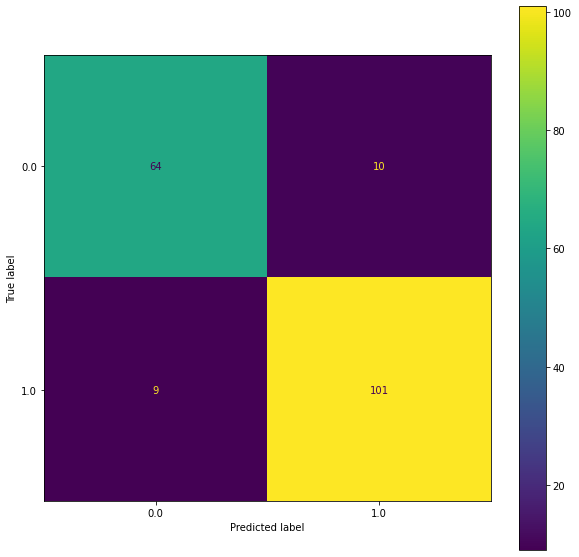

In [42]:
#Creating the GradientBoostingClassifier model with the previously obtained parameters and the splitted data
from sklearn.metrics import classification_report 
from sklearn.ensemble import GradientBoostingClassifier
sgb = GradientBoostingClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 100, subsample= 0.7) # get instance of model
sgb.fit(x_train, y_train) # Train/Fit model 
y_pred8 = sgb.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, y_pred8)) # output accuracy
cm_sgb = confusion_matrix(y_test, y_pred8, labels=sgb.classes_)
disp_sgb = ConfusionMatrixDisplay(confusion_matrix=cm_sgb,display_labels=sgb.classes_)
disp_sgb.plot()
plt.show()

# XGBoost Classifier

In [26]:
#Performing GridSearch and Cross-Validation with a XGBClassifier to get the best hyper-parameters
import xgboost as xgb
# define models and parameters
model = xgb.XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42)
max_depth = range (2, 10, 1)
n_estimators = range(60, 220, 40)
learning_rate = [0.1, 0.01, 0.05]
gamma = np.arange(0.5, 10.5, 1)
# define grid search
#Dictionary containing the diferent parameters to test
grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_all, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

c:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:25:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.876198 using {'gamma': 2.5, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
0.868932 (0.041170) with: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 60}
0.870035 (0.042620) with: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
0.871114 (0.041463) with: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 140}
0.871831 (0.041173) with: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 180}
0.874737 (0.040865) with: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 60}
0.873642 (0.041379) with: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.871102 (0.043720) with: {'gamma': 0.5, 'learning_rat

c:\Users\Marcelo\.conda\envs\ai2_2022\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        74
         1.0       0.93      0.93      0.93       110

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



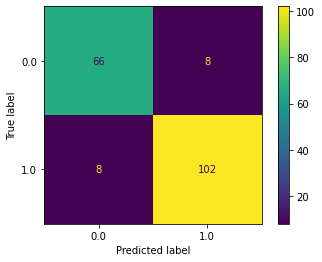

In [20]:
#Creating the XGBClassifier model with the previously obtained parameters and the splitted data
import xgboost as xgb
xgb_class = xgb.XGBClassifier(objective ='binary:logistic',eval_metric='auc', learning_rate = 0.05,
                max_depth = 5, alpha = 10, n_estimators = 100,use_label_encoder=False,importance_type='weight',
                gamma=2.5,num_class=1)
xgb_class.fit(x_train,y_train)
y_pred9 = xgb_class.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, y_pred9)) # output accuracy
cm_xgb_class = confusion_matrix(y_test, y_pred9, labels=xgb_class.classes_)
disp_xgb_class = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_class,display_labels=xgb_class.classes_)
disp_xgb_class.plot()
plt.show()

In [18]:
#Getting all the parameters of the XGBClassifier model
xgb_class.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0.5,
 'gpu_id': -1,
 'importance_type': 'weight',
 'interaction_constraints': '',
 'learning_rate': 0.05,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 10,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'auc',
 'alpha': 10,
 'num_class': 1}

In [66]:
#Re-training XGB Classifier test
xgb_class_trained = xgb.XGBClassifier(num_class=0)
booster = xgb_class.get_booster()
xgb_class.fit(x_test[:10],y_test[:10],xgb_model = booster)#re-training needs at least 1 of each class
y_pred9 = xgb_class.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred9)) # output accuracy

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        74
         1.0       0.93      0.93      0.93       110

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



In [18]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred9))
print("RMSE: %f" % (rmse))

RMSE: 0.265805


### Ploting boosting tree and feature importance using XGBClassifier
In this way we can plot the decision tree and get the Feature Importance

In [22]:
# Assigning labels to XGBClassifier booster to plot the boosting tree and the feature importance
xgb_class.get_booster().feature_names =labels_proc_pred
xgb_class.get_booster().feature_names
print(xgb_class.get_booster().get_score(importance_type='weight'))

{'Sex_F': 32.0, 'ChestPainType_ASY': 33.0, 'ExerciseAngina_N': 14.0, 'ST_Slope_Flat': 21.0, 'ST_Slope_Up': 22.0, 'Age': 2.0, 'RestingBP': 3.0, 'Cholesterol': 22.0, 'FastingBS': 7.0, 'MaxHR': 30.0, 'Oldpeak': 55.0}


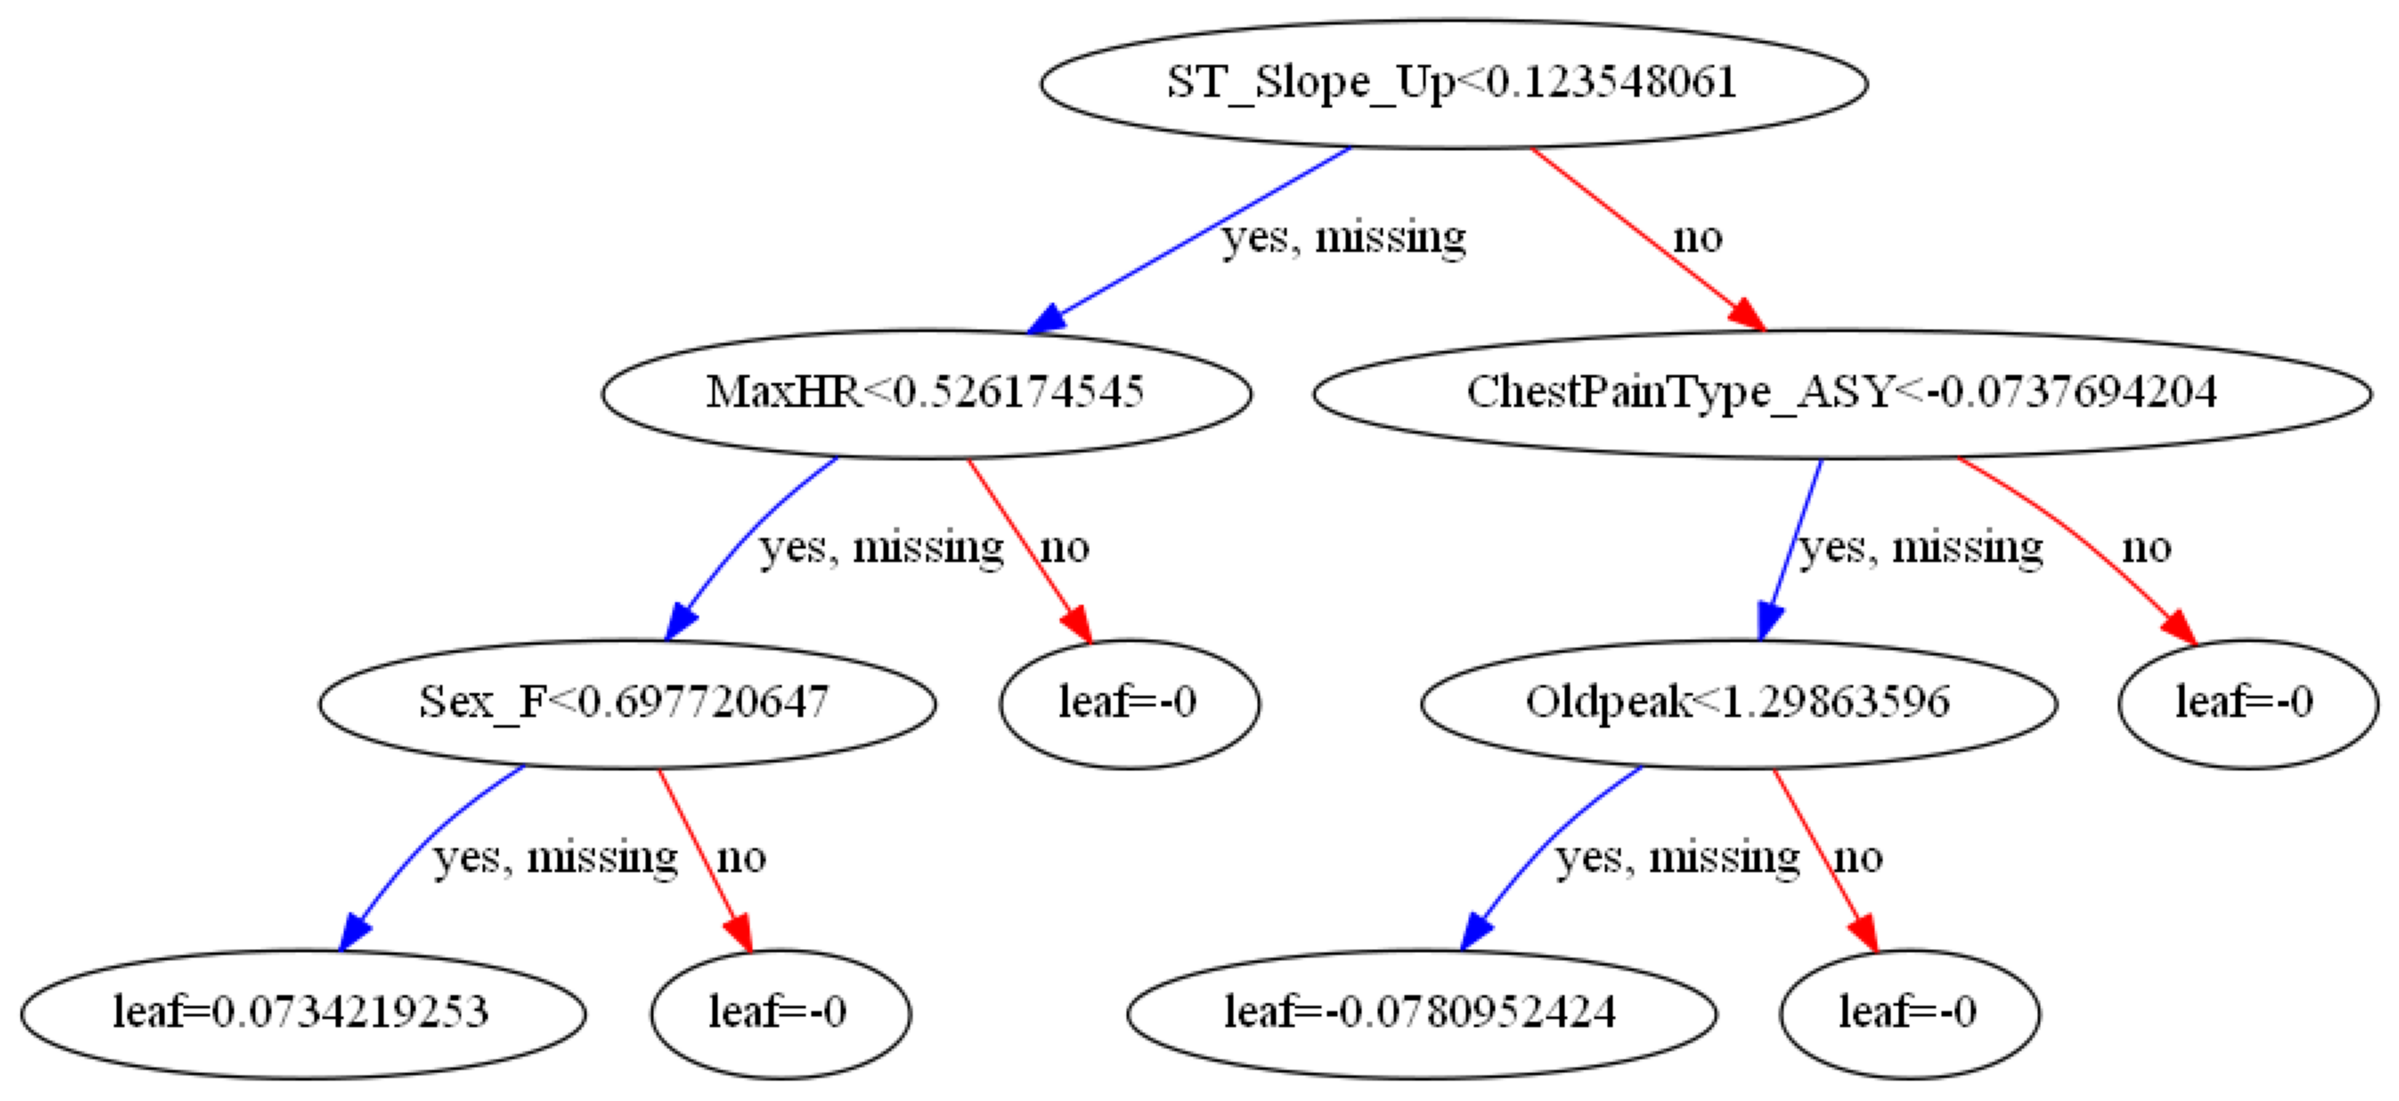

In [24]:
#Visualize Boosting Tree
xgb.plot_tree(xgb_class.get_booster(),num_trees=0)
plt.rcParams['figure.figsize'] = [100, 20]
plt.show()

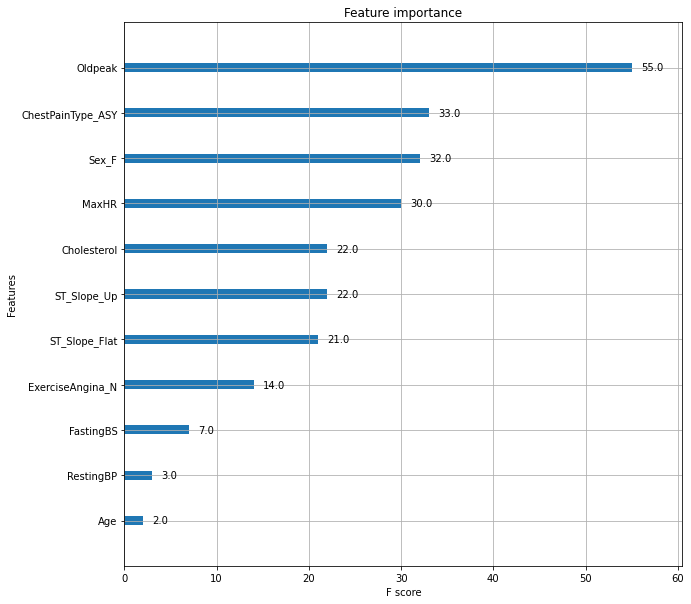

In [26]:
#Visualize Feature Importance
xgb.plot_importance(xgb_class.get_booster(),ylabel='Features' )
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [71]:
# Feature importance % based  on the hyper parameter "importance_type='weight'" of the XGBClassifier
feat_importance = xgb_class.feature_importances_*100
feat_importance

array([13.278009 ,  0.       , 13.692946 ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  5.8091288,
        0.       ,  0.       ,  8.713694 ,  9.128631 ,  0.8298756,
        1.2448133,  9.128631 ,  2.9045644, 12.4481325, 22.821577 ],
      dtype=float32)

In [63]:
#Creating feature importance dictionary with its labels and values
feat_dict = {}
for i in range(len(feat_importance)):
    feat_dict[labels_proc_pred[i]] = feat_importance[i]
feat_dict

{'Sex_F': 13.278009,
 'Sex_M': 0.0,
 'ChestPainType_ASY': 13.692946,
 'ChestPainType_ATA': 0.0,
 'ChestPainType_NAP': 0.0,
 'ChestPainType_TA': 0.0,
 'RestingECG_LVH': 0.0,
 'RestingECG_Normal': 0.0,
 'RestingECG_ST': 0.0,
 'ExerciseAngina_N': 5.8091288,
 'ExerciseAngina_Y': 0.0,
 'ST_Slope_Down': 0.0,
 'ST_Slope_Flat': 8.713694,
 'ST_Slope_Up': 9.128631,
 'Age': 0.8298756,
 'RestingBP': 1.2448133,
 'Cholesterol': 9.128631,
 'FastingBS': 2.9045644,
 'MaxHR': 12.4481325,
 'Oldpeak': 22.821577}

In [70]:
#Sorting feature importance dicctionary
sorted_feat_dict = {k: v for k, v in sorted(feat_dict.items(), key=lambda item: item[1])}
sorted_feat_dict

{'Sex_M': 0.0,
 'ChestPainType_ATA': 0.0,
 'ChestPainType_NAP': 0.0,
 'ChestPainType_TA': 0.0,
 'RestingECG_LVH': 0.0,
 'RestingECG_Normal': 0.0,
 'RestingECG_ST': 0.0,
 'ExerciseAngina_Y': 0.0,
 'ST_Slope_Down': 0.0,
 'Age': 0.8298756,
 'RestingBP': 1.2448133,
 'FastingBS': 2.9045644,
 'ExerciseAngina_N': 5.8091288,
 'ST_Slope_Flat': 8.713694,
 'ST_Slope_Up': 9.128631,
 'Cholesterol': 9.128631,
 'MaxHR': 12.4481325,
 'Sex_F': 13.278009,
 'ChestPainType_ASY': 13.692946,
 'Oldpeak': 22.821577}

#  Soft and Hard Voting in Ensemble Models

In [43]:
#Here we are defining a dictionary with the best models in order to construct the voting classiffiers
classifiers = dict()
classifiers["XG Boost"] = xgb_class
classifiers["K-Nearest Neighbors"] = k_near
classifiers['Stochastic Gradient Boosting'] = sgb
classifiers['Random Forest'] = rd_forest
classifiers['Multi-Layer Perceptron'] = mlp
estimators = list(classifiers.items())

In [44]:
estimators

[('XG Boost',
  XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                eval_metric='auc', gamma=2.5, gpu_id=-1, importance_type='weight',
                interaction_constraints='', learning_rate=0.05, max_delta_step=0,
                max_depth=5, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_class=1, num_parallel_tree=1, predictor='auto',
                random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
                subsample=1, tree_method='exact', use_label_encoder=False, ...)),
 ('K-Nearest Neighbors',
  KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='manhattan',
                       n_neighbors=15)),
 ('Stochastic Gradient Boosting',
  GradientBoostingClassifier(learning_rate=0.01, subsample=0.7)),
 ('Random Forest',
  RandomForestClassifier(class

In [45]:
#Creating the Voting Classifiers with the previously defined estimators
from sklearn.ensemble import VotingClassifier
vc_sv = VotingClassifier(estimators=estimators, voting="soft")
vc_hv = VotingClassifier(estimators=estimators, voting="hard")

In [80]:
vc_sv.get_params()

{'estimators': [('XG Boost',
   XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                 eval_metric='auc', gamma=0.5, gpu_id=-1, importance_type='weight',
                 interaction_constraints='', learning_rate=0.05, max_delta_step=0,
                 max_depth=3, min_child_weight=1, missing=nan,
                 monotone_constraints='()', n_estimators=100, n_jobs=8,
                 num_class=1, num_parallel_tree=1, predictor='auto',
                 random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
                 subsample=1, tree_method='exact', use_label_encoder=False, ...)),
  ('K-Nearest Neighbors',
   KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='manhattan',
                        n_neighbors=21, weights='distance')),
  ('Stochastic Gradient Boosting',
   GradientBoostingClassifier(learning_rate=0.01, subsample=0.7)),


              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88        74
         1.0       0.92      0.93      0.92       110

    accuracy                           0.91       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184



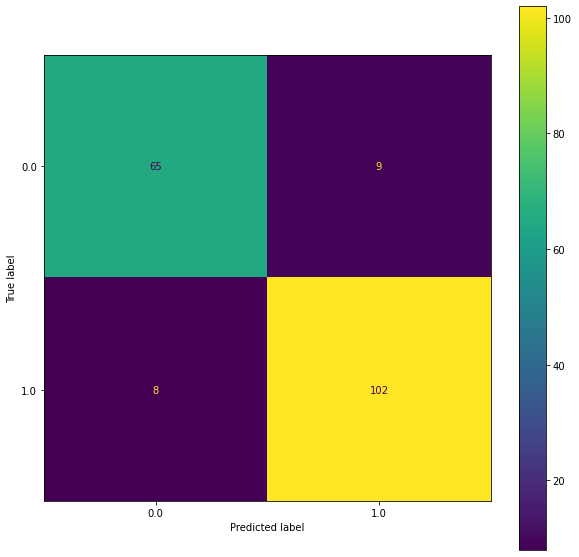

In [46]:
#Creating the SoftVotingClassifier model with the splitted data
vc_sv.fit(x_train, y_train) # Train/Fit model 
vc_sv_pred = vc_sv.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, vc_sv_pred)) # output accuracy
cm_vc_sv = confusion_matrix(y_test, vc_sv_pred, labels=vc_sv.classes_)
disp_vc_sv = ConfusionMatrixDisplay(confusion_matrix=cm_vc_sv,display_labels=vc_sv.classes_)
disp_vc_sv.plot()
plt.show()

In [47]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer
def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [48]:
# Performing Cross Validation for Soft Voting Classifier
from sklearn.model_selection import cross_val_score
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
nested_score = cross_val_score(estimator=vc_sv,X=X_all, y=y, cv=cv, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score)

              precision    recall  f1-score   support

         0.0       0.85      0.80      0.83        41
         1.0       0.85      0.88      0.87        51

    accuracy                           0.85        92
   macro avg       0.85      0.84      0.85        92
weighted avg       0.85      0.85      0.85        92

              precision    recall  f1-score   support

         0.0       0.83      0.71      0.76        41
         1.0       0.79      0.88      0.83        51

    accuracy                           0.80        92
   macro avg       0.81      0.79      0.80        92
weighted avg       0.81      0.80      0.80        92

              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86        41
         1.0       0.87      0.92      0.90        51

    accuracy                           0.88        92
   macro avg       0.88      0.88      0.88        92
weighted avg       0.88      0.88      0.88        92

              preci

In [49]:
#Accurancy of soft voting classifier with CrossValidation
np.mean(nested_score)

0.8751114827201784

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88        74
         1.0       0.92      0.93      0.92       110

    accuracy                           0.91       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184



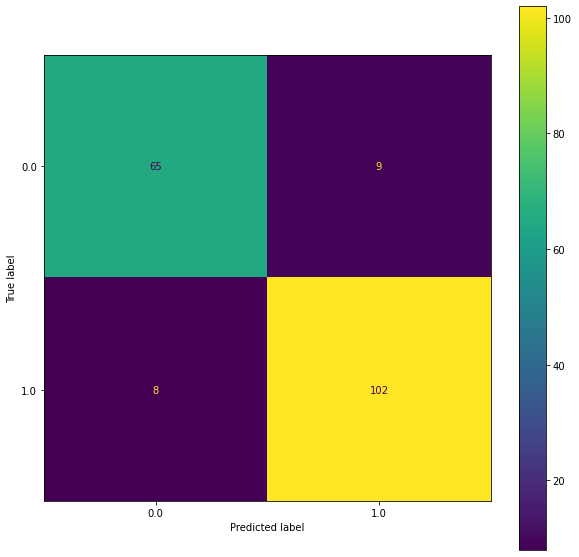

In [50]:
#Creating the HardVotingClassifier model with the splitted data
vc_hv.fit(x_train, y_train) # Train/Fit model 
vc_hv_pred = vc_hv.predict(x_test) # get y predictions
#Testing the model with the classification report and confusion matrix
print(classification_report(y_test, vc_hv_pred)) # output accuracy
cm_vc_hv = confusion_matrix(y_test, vc_hv_pred, labels=vc_hv.classes_)
disp_vc_hv = ConfusionMatrixDisplay(confusion_matrix=cm_vc_hv,display_labels=vc_hv.classes_)
disp_vc_hv.plot()
plt.show()

In [51]:
# Performing Cross Validation for Hard Voting Classifier
from sklearn.model_selection import cross_val_score
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
nested_score = cross_val_score(estimator=vc_hv,X=X_all, y=y, cv=cv, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score)

              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82        41
         1.0       0.84      0.90      0.87        51

    accuracy                           0.85        92
   macro avg       0.85      0.84      0.84        92
weighted avg       0.85      0.85      0.85        92

              precision    recall  f1-score   support

         0.0       0.80      0.68      0.74        41
         1.0       0.77      0.86      0.81        51

    accuracy                           0.78        92
   macro avg       0.79      0.77      0.78        92
weighted avg       0.78      0.78      0.78        92

              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86        41
         1.0       0.87      0.92      0.90        51

    accuracy                           0.88        92
   macro avg       0.88      0.88      0.88        92
weighted avg       0.88      0.88      0.88        92

              preci

In [52]:
#Accurancy of hard voting classifier with CrossValidation
np.mean(nested_score)

0.8700430004777829

In [53]:
import joblib

### Saving Models, scaler and encoder to be used in the app

In [54]:
#Saving xgb model to get the feature importance
joblib.dump(xgb_class,'AiModels\XGBClassifier.pkl')

['AiModels\\XGBClassifier.pkl']

In [55]:
#Saving OneHotEncoder for predictions (without the output class)
joblib.dump(transformerOHE_pred,'OHE\OHEncoder.pkl')

['OHE\\OHEncoder.pkl']

In [56]:
#Saving Scaler for predictions
joblib.dump(scaler_all,'Scaler\SScaler.pkl')

['Scaler\\SScaler.pkl']

In [57]:
#Saving Soft Voting Classifier
joblib.dump(vc_sv,'AiModels\SVClassifier.pkl')

['AiModels\\SVClassifier.pkl']

In [58]:
#Saving OneHotEncoder for encodig all the original dataset
joblib.dump(transformerOHE,'OHE\OHEncoderOriginal.pkl')

['OHE\\OHEncoderOriginal.pkl']

In [59]:
#Saving mlp model to be used as main model since it is one of the most accurate models and it lets us retrain it with new
#data in an easy way
joblib.dump(mlp,'AiModels\MLPClassifier.pkl')

['AiModels\\MLPClassifier.pkl']